In [1]:
from __future__ import print_function

#Machine Learning in Python

##Regression Basics

###1: Looking at the data

We have a dataset in csv format. It contains information about the S&P 500. The S&P 500 is a US stock market index -- its price is computed by taking into account the prices of all the constituent stocks in the index and weighting them. The S&P 500 has 500 constituent stocks from a variety of sectors, and encompasses a broad swath of the US economy. If you want more information on the process, you can look <a href = "http://www.investopedia.com/ask/answers/05/sp500calculation.asp">here</a>.

The idea behind the S&P 500 is that it's an index which indicates how the market as a whole is doing. If Apple stock goes up or down tomorrow, it doesn't tell you much about what's going on with the market as a whole. But if the S&P 500, whose price is computed by evaluating the prices of 500 different stocks, goes down, then the market as a whole probably isn't doing very well. This is why you often hear about indices like the S&P 500, NASDAQ, and Dow Jones on the news.

Because it's less risky than investing in a single stock, many people also invest in index funds, and make or lose money when the S&P 500 index changes.

Our dataset contains the closing price -- the price each day when the markets close -- of the S&P 500 from 2005 to 2015.

We only have two columns:
- date -- the date of the price. In the format yyyy-mm-dd (2015-06-26 is an example).
- value -- The price, in US dollars, of the S&P 500 at market close.

Let's look a bit more closely at the data.

####Instructions

Use the .head() method on a pandas dataframe to print the first 10 rows of sp500.

In [2]:
import pandas

sp500 = pandas.read_csv("data/sp500.csv")
sp500.head(10)

,date,value
0,27/06/2005,1190.689941
1,28/06/2005,1201.569946
2,29/06/2005,1199.849976
3,30/06/2005,1191.329956
4,1/07/2005,1194.439941
5,5/07/2005,1204.989990
6,6/07/2005,1194.939941
7,7/07/2005,1197.869995
8,8/07/2005,1211.859985
9,11/07/2005,1219.439941


###2: Cleaning the invalid rows

You might have noticed that some rows contain a . in the value column. This is a result of market holidays. For example 2005-07-04 is the July 4th holiday in the US, and the stock market is shutdown. This means that there is no trading, and thus no market close price.

We need to filter these rows out if we are to proceed with our analysis.

####Instructions

Remove any rows that contain a . in the value column from the sp500 dataframe.

In [3]:
# The data is loaded into the sp500 variable.
#sp500 = sp500[sp500["value"] != "."]

###3: Finding the predictors

Let's say that we want to predict what tomorrow's market close price will be. We have all the data we need to do this, but we don't have it in the right format. In order to apply a machine learning algorithm, both the data that we want to use the predict, and the actual value that we want to predict need to be in the same row. Each row is a single observation, and it makes it much easier to apply machine learning algorithms.

In this case, we want to predict the next day's market close price using the current day's market close price.

Here's what we need our data to look like:

             date    value  next_day
    0  2005-06-27  1190.69   1201.57
    1  2005-06-28  1201.57   1199.85
    2  2005-06-29  1199.85   1191.33
    3  2005-06-30  1191.33   1194.44
    4  2005-07-01  1194.44   1204.99

So, we need to add a next_day column that contains the next day's market close price.

####Instructions

Create a next_day column and add it to the sp500 dataframe. Note that for the last row in the dataset, the date 2015-06-26, there won't be a next day. Drop this row entirely.

One caveat: You may remember dataframe indexing and how it works. Each row in a dataframe or series is assigned a unique index. When we add the next_day column to the sp500 dataframe, we want to ignore the index, and add the values by position. We can achieve this by doing sp500["next_day"] = next_day.values (assuming the next_day variable contains the next day prices you want to add).

In [4]:
# This prints the last 10 rows -- note where the dataset ends.
print(sp500.tail(10))

next_day = sp500["value"].iloc[1:]
sp500 = sp500.iloc[:-1,:]
sp500["next_day"] = next_day.values

            date        value
2596  19/10/2015  2033.660034
2597  20/10/2015  2030.770020
2598  21/10/2015  2018.939941
2599  22/10/2015  2052.510010
2600  23/10/2015  2075.149902
2601  26/10/2015  2071.179932
2602  27/10/2015  2065.889893
2603  28/10/2015  2090.350098
2604  29/10/2015  2089.409912
2605  30/10/2015  2079.360107


###4: Converting columns to floats

In pandas dataframes, each column has a different datatype. These types closely mirror built in python types, with float, integer, boolean, and object types. The object type can contain string data.

Pandas tries to automatically infer the right column type when you read in a csv file. Unfortunately, our value column had some entries that were ., which isn't a valid number. Thus, pandas recognized the column as a string, not a float.

In order to use the next_day and value columns in a machine learning algorithm, they will need to be converted to be floats first. This is because machine learning algorithms can't deal with strings.

We can perform these conversions with dataframe["column_name"] = dataframe["column_name"].astype(float). This will replace the column with the float version of itself.

####Instructions

Convert the value and next_day columns in sp500 to be of type float.

In [5]:
# We can see the current types of the columns
print(sp500.dtypes)

sp500["value"] = sp500["value"].astype(float)
sp500["next_day"] = sp500["next_day"].astype(float)

date         object
value       float64
next_day    float64
dtype: object


###5: Making predictions

We're trying to make continuous predictions. That is, we're not predicting which category the stocks fall into, we're predicting the actual price. The price also has a clear ordering -- 200 in the next_day column is worth more than 100, which is worth more than 0. Because we are predicting continuous values, and there is this ordering, regression is a good fit for this problem.

There is another type of machine learning approach, classification, that would be better suited if we were trying to not predict the price of the stock, but only if it would go up or down the next day.

We used linear regression before to make predictions, and we can do the same thing here. In this case, we'll be using the value column to predict the next_day column in the sp500 dataframe.

Instead of using statsmodels like we did earlier, we can use the linear regression class in the sckit-learn package. This is the standard package for machine learning in python, and it's going to be used extensively in future lessons.

In order to use an algorithm in the scikit-learn package, we first have to initialize the algorithm class with some parameters. We can then call the class to predict values.

In [6]:
# Import the linear regression class
from sklearn.linear_model import LinearRegression

# Initialize the linear regression class.
regressor = LinearRegression()

# We're using 'value' as a predictor, and making predictions for 'next_day'.
# The predictors need to be in a dataframe.
# We pass in a list when we select predictor columns from "sp500" to force pandas not to generate a series.
predictors = sp500[["value"]]
to_predict = sp500["next_day"]

# Train the linear regression model on our dataset.
regressor.fit(predictors, to_predict)

# Generate a list of predictions with our trained linear regression model
next_day_predictions = regressor.predict(predictors)
print("next_day_predictions:\n", next_day_predictions)

next_day_predictions:
 [ 1191.12642286  1202.00184152  1200.28259655 ...,  2065.95744415
  2090.40733823  2089.46754855]


###6: Measuring error

Now that we've fit a model and made predictions, we can figure out the error of our model. Once commonly used error metric for regression is mean squared error, or MSE. Here's the formula:

$MSE = \frac{1}{n}\sum_{i=1}^{n}(\hat{Y_{i}} - Y_{i})^{2}$

We take each prediction, and each actual observed value, and subtract them from each other. Then, we square the resulting differences and add them all together. Then, we divide that sum by the number of predictions made.

####Instructions

Compute the mean square error of our predictions. Assign the result to mse.

In [7]:
# The actual values are in to_predict, and the predictions are in next_day_predictions.
mse = sum((to_predict - next_day_predictions) ** 2)
print("mse:", mse)

mse /= len(next_day_predictions)

mse: 628521.368107


###7: Overfitting

One problem with measuring error with our predictions is that our model was trained using the same data we predicted on. 

Think of it like telling someone that 2+2 is 4, then asking them what 2+2 is. They have full information, and thus their answer for that particular problem will always be correct or close to correct. But they won't understand the underlying mechanism of addition, so if you ask them what 3+3 is, they might not know the answer.

Asking a model to make predictions on data it's been trained using is very similar to this. The model could give you great answers on the data it's been trained using, but we won't know if the model can "understand" the underlying process, and make accurate predictions on new data. With machine learning, it's almost always our goal to make predictions on new data.

Making predictions on data you've trained a model on is known as overfitting. Overfitting usually results in a very low error rate, because the model has already "seen" the correct answers. But performance on "unseen" data, or new data, will almost always be significantly worse. This can cause a lot of unexpected surprises when it comes time to put your machine learning model to work.

Overfitting is a very important concept, and we'll dive into it more later. For now, it's important to note that we have overfit, and should correct it.

The best way to avoid overfitting is to make predictions on data that hasn't been used to train the model. We randomly assign some data to a training set, to train the algorithm, and some data to a test set, where we make predictions and evaluate error.

####Instructions

Train regressor using the value column in train. Make predictions on the test set. Calculate the MSE in the test set, and assign the result to mse.

In [8]:
import numpy as np
import random

# Set a random seed to make the shuffle deterministic.
np.random.seed(1)
random.seed(1)

# Randomly shuffle the rows in our dataframe
sp500 = sp500.loc[np.random.permutation(sp500.index)]

# Select 70% of the dataset to be training data
highest_train_row = int(sp500.shape[0] * .7)
train = sp500.loc[:highest_train_row,:]

# Select 30% of the dataset to be test data.
test = sp500.loc[highest_train_row:,:]

regressor = LinearRegression()
regressor.fit(train[["value"]], train["next_day"])
predictions = regressor.predict(test[["value"]])

mse = sum((predictions - test["next_day"]) ** 2) / len(predictions)
print("mse:", mse)

mse: 259.202684244


###8: Visualizing the fit

Error metrics can tell us a lot about how good a regression model is, but sometimes being able to visualize what's going on is much more valuable.

We can plot our predictions on a line over our data points. The way to do this is that when we create plots, until we call plt.show(), everything is drawn on the same canvas. So, we can make a scatterplot with our data points, draw a line over it, and finally show the plot.

####Instructions

Make a scatterplot for the test dataframe with value on the x axis, and next_day on the y axis. Draw a line over this that has value on the x axis, and the predictions on the y axis. The predictions are in the predictions variable.

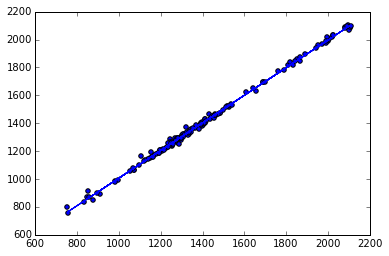

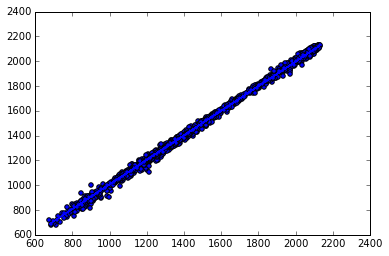

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Make a scatterplot with the actual values in the training set
plt.scatter(train["value"], train["next_day"])
plt.plot(train["value"], regressor.predict(train[["value"]]))
plt.show()

plt.scatter(test["value"], test["next_day"])
plt.plot(test["value"], predictions)
plt.show()

###9: Other error metrics

Two other commonly used error metrics are root mean squared error, or RMSE, and mean absolute error, or MAE.

RMSE is just the square root of MSE.

$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\hat{Y_{i}} - Y_{i})^{2}}$

MAE is the mean of the absolute values of all the differences between prediction and actual values.

$MAE = \frac{1}{n}\sum_{i=1}^{n}\left |\hat{Y}_{i}-Y_{i}  \right |$

MSE and RMSE, because they square the errors, penalize large errors way out of proportion to small errors. MAE, on the other hand, doesn't. MAE can be useful, because it is a more accurate look at the average error.

####Instructions

Calculate the RMSE between the test set predictions and the actual values. Assign the result to rmse.

Calculate the MAE between the test set predictions and the actual values. Assign the result to mae.

In [10]:
import math

# The test set predictions are in the predictions variable.
rmse = math.sqrt(sum((predictions - test["next_day"]) ** 2) / len(predictions))
print("rmse:", rmse)

mae = sum(abs(predictions - test["next_day"])) / len(predictions)
print("mae:", mae)

rmse: 16.09977280100422
mae: 11.1729586066


###10: Future steps

We could do a lot of things to improve the error rate, and extend the analysis. Foremost among these is to generate features that better take into account the information we have. For example, we're only using the price today to predict the price tomorrow, but we could use the trend in price over the past week, and many other features to make the same prediction.

We could also use a different algorithm instead of linear regression -- as you can see, the line isn't a perfect fit to the data.

We could also forecast the market more than one day into the future. We could predict the price a week or two weeks out.